# 정규선형모델

## 단순회귀

- 단순회귀: 연속형 독립변수가 1개만 있는 정규선형모델

In [5]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd
sns.set()

%precision 3
%matplotlib inline

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
beer = pd.read_csv("beer.csv")
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


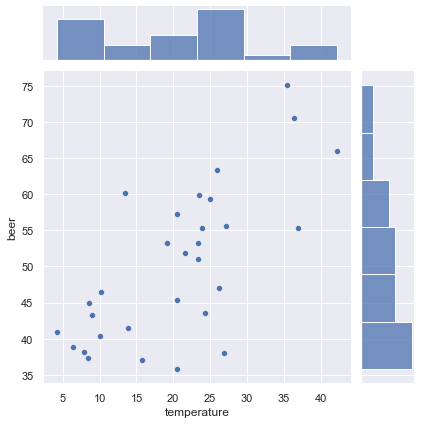

In [8]:
sns.jointplot(x="temperature", y="beer", data=beer)

### 모델 구축

$$ 맥주매상 \sim \mathcal{N} \left ( \beta_0 + \beta_1 \times 기온, \sigma^2 \right ) $$

### statsmodels를 이용한 모델링 

```python

lm_model=smf.ols(formula="beer ~ temperature", data=beer).fit()
```

In [9]:
lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()
null_model = smf.ols(formula="beer ~ 1", data=beer).fit()

In [10]:
dir(lm_model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [11]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.11e-05
Time:                        17:32:09   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
lm_model.aic

208.90902935575437

In [13]:
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                nan
Time:                        17:33:05   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회귀직선
- [sns.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)
- 95% 신뢰구간

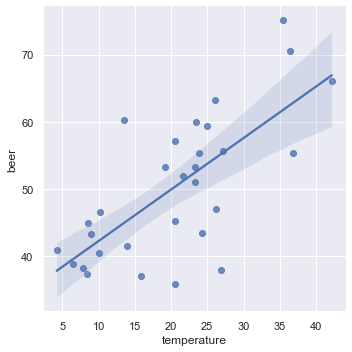

In [14]:
sns.lmplot(x="temperature", y="beer", data=beer)

### 모델을 이용한 예측

- lm_model.predict(pd.DataFrame())


In [15]:
lm_model.predict(pd.DataFrame({'temperature': [0]}))

0    34.610215
dtype: float64

In [16]:
lm_model.predict(pd.DataFrame({'temperature': [20]}))

0    49.918767
dtype: float64

In [17]:
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [18]:
lm_model.predict(beer['temperature'])

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
dtype: float64

In [19]:
lm_model.predict(pd.DataFrame({'temperature': np.arange(0, 30, 1)}))

0     34.610215
1     35.375643
2     36.141070
3     36.906498
4     37.671926
5     38.437353
6     39.202781
7     39.968208
8     40.733636
9     41.499064
10    42.264491
11    43.029919
12    43.795346
13    44.560774
14    45.326201
15    46.091629
16    46.857057
17    47.622484
18    48.387912
19    49.153339
20    49.918767
21    50.684195
22    51.449622
23    52.215050
24    52.980477
25    53.745905
26    54.511333
27    55.276760
28    56.042188
29    56.807615
dtype: float64

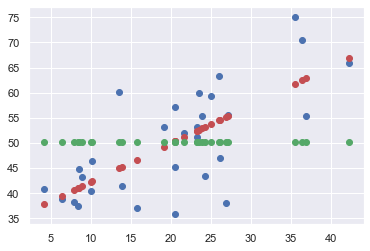

In [21]:
plt.plot(beer['temperature'], beer['beer'], 'bo')
plt.plot(beer['temperature'], lm_model.predict(beer['temperature']), 'ro')
plt.plot(beer['temperature'], null_model.predict(), 'go')

#### 모델 추정파라미터

- lm_model.params

In [22]:
null_model.params

Intercept    50.186667
dtype: float64

In [23]:
beer['beer'].mean()

50.18666666666665

### 잔차

$$ residuals = y_i-\hat{y}_i$$
- lm_model.resid

$$ \sum (y_i-\mu)^2 = \sum (\hat{y}_i-\mu)^2 + \sum (y_i - \hat{y}_i)^2 $$
- **SST=SSE+SSR**

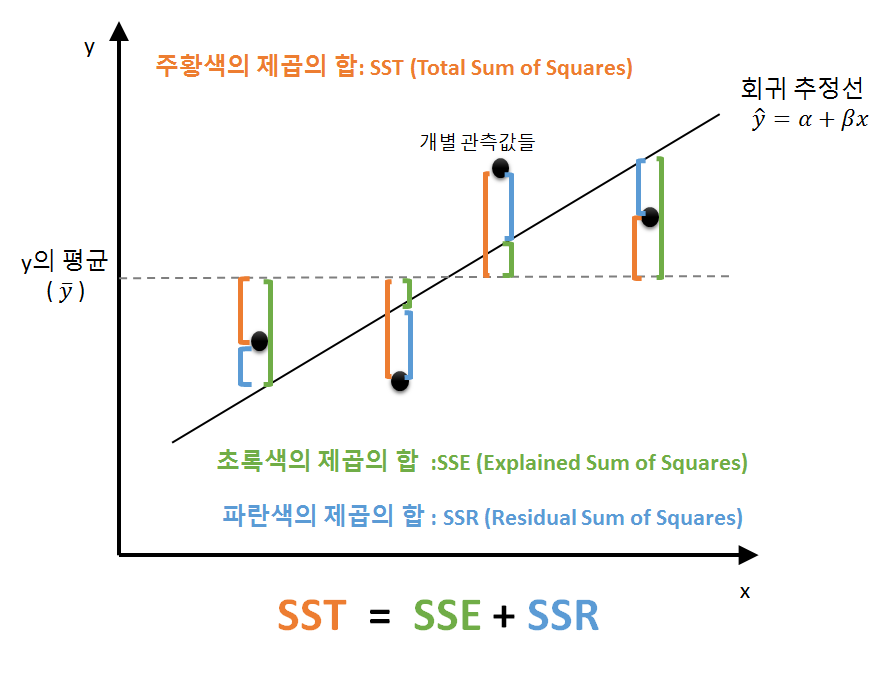
 https://igija.tistory.com/256 참조

### 결정계수

- $R^2 = \frac{SSE}{SST}=1-\frac{SSR}{SST}$

### 수정결정계수

- 과적합을 막기위해 독립변수 갯수로 페널티를 적용한 결정계수

- $R_{adj.}^2 =1-\frac{SSR}{SST}\cdot \frac{N-1}{N-s-1}$


In [24]:
lm_model.resid

0     -5.001481
1      5.554095
2     -1.864491
3    -17.200217
4     -9.703971
5      3.074989
6     15.256512
7      8.788667
8     -1.344678
9      3.783650
10    -7.664418
11     3.970118
12    -9.710106
13     0.755322
14    -3.639807
15     7.302236
16    -3.749659
17    13.317105
18     0.170154
19     6.898519
20     4.082423
21   -14.501481
22     0.756549
23    -2.457093
24    -0.911259
25     2.396065
26    -7.554493
27     1.877479
28     8.028221
29    -0.708952
dtype: float64

In [25]:
beer['beer'].head(3)

0    45.3
1    59.3
2    40.4
Name: beer, dtype: float64

In [26]:
lm_model.fittedvalues

0     50.301481
1     53.745905
2     42.264491
3     55.200217
4     46.703971
5     37.825011
6     44.943488
7     54.511333
8     52.444678
9     41.116350
10    54.664418
11    49.229882
12    53.210106
13    52.444678
14    41.039807
15    52.597764
16    45.249659
17    61.782895
18    55.429846
19    50.301481
20    42.417577
21    50.301481
22    51.143451
23    40.657093
24    66.911259
25    52.903935
26    62.854493
27    41.422521
28    62.471779
29    39.508952
dtype: float64

In [27]:
lm_model.rsquared

0.5039593230611856

In [28]:
45.3-50.301481

-5.001

### 잔차 그래프

- 잔차분포 sns.distplot
- 잔차와 적합값과이 관계도 sns.jointplot
- Q-Q plot 

/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

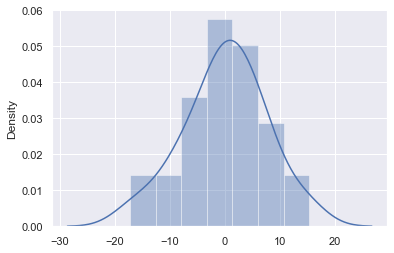

In [29]:
sns.distplot(lm_model.resid)

/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


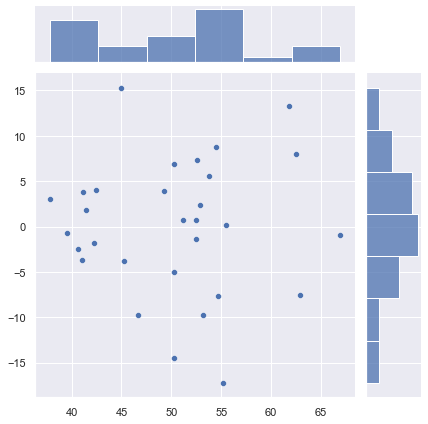

In [30]:
sns.jointplot(lm_model.fittedvalues, lm_model.resid)

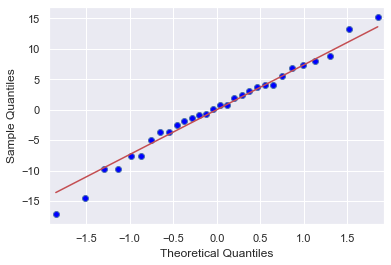

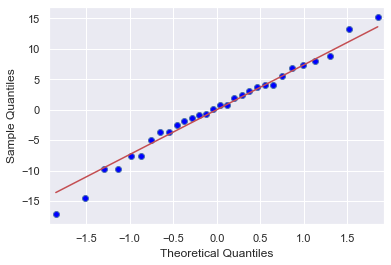

In [32]:
sm.qqplot(lm_model.resid, line="s")

In [33]:
lm_model.resid.sort_values(ascending=False)

6     15.256512
17    13.317105
7      8.788667
28     8.028221
15     7.302236
19     6.898519
1      5.554095
20     4.082423
11     3.970118
9      3.783650
5      3.074989
25     2.396065
27     1.877479
22     0.756549
13     0.755322
18     0.170154
29    -0.708952
24    -0.911259
8     -1.344678
2     -1.864491
23    -2.457093
14    -3.639807
16    -3.749659
0     -5.001481
26    -7.554493
10    -7.664418
4     -9.703971
12    -9.710106
21   -14.501481
3    -17.200217
dtype: float64

In [35]:
resid_sort = null_model.resid.sort_values()
#ascending=False
resid_sort

21   -14.386667
4    -13.186667
14   -12.786667
3    -12.186667
23   -11.986667
29   -11.386667
2     -9.786667
5     -9.286667
16    -8.686667
27    -6.886667
12    -6.686667
9     -5.286667
0     -4.886667
20    -3.686667
10    -3.186667
8      0.913333
22     1.713333
11     3.013333
13     3.013333
25     5.113333
26     5.113333
18     5.413333
19     7.013333
1      9.113333
15     9.713333
6     10.013333
7     13.113333
24    15.813333
28    20.313333
17    24.913333
dtype: float64

In [36]:
nobs = len(resid_sort)
cdf = np.arange(1,nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [37]:
ppf=stats.norm.ppf(cdf,scale=resid_sort.std())
ppf

array([-19.651, -16.136, -13.821, -12.023, -10.515,  -9.194,  -8.002,
        -6.903,  -5.873,  -4.895,  -3.958,  -3.05 ,  -2.164,  -1.293,
        -0.43 ,   0.43 ,   1.293,   2.164,   3.05 ,   3.958,   4.895,
         5.873,   6.903,   8.002,   9.194,  10.515,  12.023,  13.821,
        16.136,  19.651])

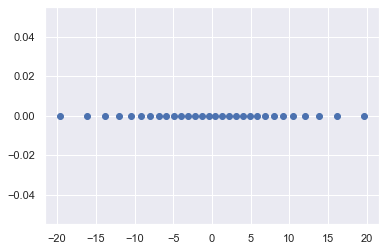

In [38]:
plt.plot(ppf,np.zeros(len(ppf)),'bo')

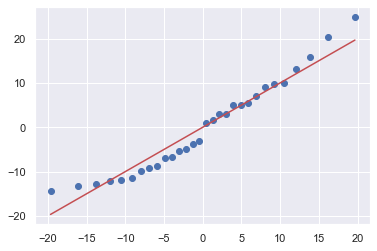

In [39]:
plt.plot(ppf,resid_sort,'bo')
plt.plot(ppf,stats.norm.ppf(cdf,scale=resid_sort.std()),'r')

### 잔차가 정규분포를 띄는가?

In [40]:
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 06 Apr 2022   Prob (F-statistic):                nan
Time:                        18:27:19   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""